In [16]:
from langchain_openai import ChatOpenAI
from langchain.schema.messages import HumanMessage, AIMessage
import os
import getpass
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

LANGCHAIN_TRACING_V2='true'
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_API_KEY="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"
LANGCHAIN_PROJECT="ADs"

In [74]:
model= ChatOpenAI(model='gpt-4o-mini',temperature=0.0, max_tokens=10,)


In [18]:
response=model.invoke("massages")
print(response.content)



It seems like you're referring to "massages."


In [21]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
template = """
text : {text}
check this text was postive or negative
"""
model= ChatOpenAI(model='gpt-4o',temperature=0.5, max_tokens=10)

prompt = ChatPromptTemplate.from_template(template)

chain = prompt|model

chain.invoke({"text":"I am horny"}).content


'The text "I am horny" is neither inherently'

In [27]:
def is_suitable_text(text, model):
    template = """
    Given the following text:
    "{text}"
    Please check if the Text contains any offensive or inappropriate language (bad words) or has a not resspectful tone and reply only with `suitable` or `not suitable`.
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model
    return True if chain.invoke({"text": text}).content.lower() == "suitable" else False

is_suitable_text("new hot boy for sale",model)

True

In [40]:
def is_titleDescription_consistent(title, description, model):
    template = """
    Given the following title and description for a same product on am e-commerce website:
    Title: {title}
    Description: {description}
    now check if the title and description are in same context and related to each other, 
    and reply only with `consistent` or `not consistent`.
    """
    
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model
    return True if chain.invoke({"title": title, "description": description}).content.lower() == "consistent" else False

is_titleDescription_consistent("new car", " cat for sale", model)


False

In [ ]:
import base64
from IPython.display import HTML, display

def encode_image(image_file):
    try:
        if isinstance(image_file, str):
            # If image_file is a file path
            with open(image_file, "rb") as file:
                encoded_string = base64.b64encode(file.read()).decode("utf-8")
        else:
            # If image_file is a file-like object
            encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
        return encoded_string
    except Exception as e:
        # Handle exceptions such as file not found or read errors
        print(f"An error occurred while encoding the image: {e}")
        return None
    

def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}"/>'
    # Display the image by rendering the HTML
    display(HTML(image_html))

In [48]:
def is_imageTitle_consistent(title, base64_image, model):
    prompt=f'check is the image related to the title "{title}" and reply only with `consistent` or `not consistent`.'
    message = [HumanMessage(content=[
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                },
            },
            {"type": "text", "text": prompt},
    ])]
    response = model.invoke(message)
    return True if response.content.lower() == "consistent" else False

image_file = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/Screenshot 2024-11-05 201910.png"
image_base64 = encode_image(image_file)
# plt_img_base64(image_base64)
is_imageTitle_consistent("new car for sela", image_base64, model)

False


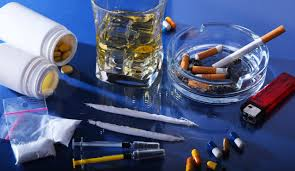

False

In [ ]:
def is_image_safe(base64_image, model):
    prompt= """
        Please analyze the image and check if it contains any of the following:
        - Weapons
        - Medical tools or TABLETS
        - Drugs or drug-related items
        - Nudity or explicit content
        If any of these categories are present in the image, respond with "Not safe". If the image is free of these items, respond with "Safe".
        """
    message = [HumanMessage(content=[
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                },
            },
            {"type": "text", "text": prompt},
    ])]
    response = model.invoke(message)
    return True if response.content.lower() == "safe" else False

# image_file = "D:/shobbak/AI/Glock-pistol.webp"
# image_file = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/Screenshot 2024-11-05 201910.png"
image_file = "D:/shobbak/AI/druges.jpeg"

image_base64 = encode_image(image_file)
plt_img_base64(image_base64)
is_image_safe(image_base64, model)


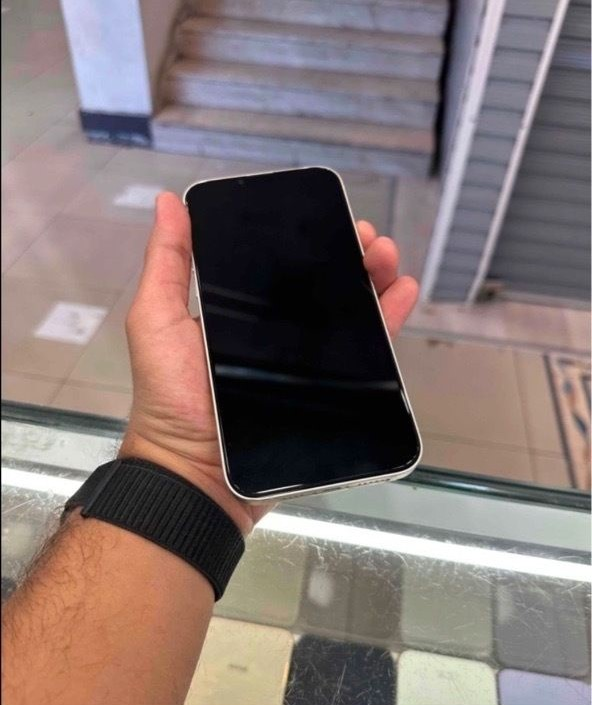

False

In [75]:
def is_person_in_image(base64_image, model):
    prompt = """
    Please analyze the image and check if it contains a full person (not just a hand ). 
    If a full person is present in the image, respond with "Person". 
    If the image does not contain a person or only contains a partial body (like a hand or arm), respond with "No person".
    """

    message = [HumanMessage(content=[
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                },
            },
            {"type": "text", "text": prompt},
    ])]
    response = model.invoke(message)
    return True if response.content.lower() == "person" else False

# image_file = "D:/shobbak/AI/Glock-pistol.webp"
# image_file = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/be-the-most-interesting.jpg"
image_file = "D:/shobbak/AI/ايفون-13-العادي-302391379-898059++3.jpg"

image_base64 = encode_image(image_file)
plt_img_base64(image_base64)
is_person_in_image(image_base64, model)



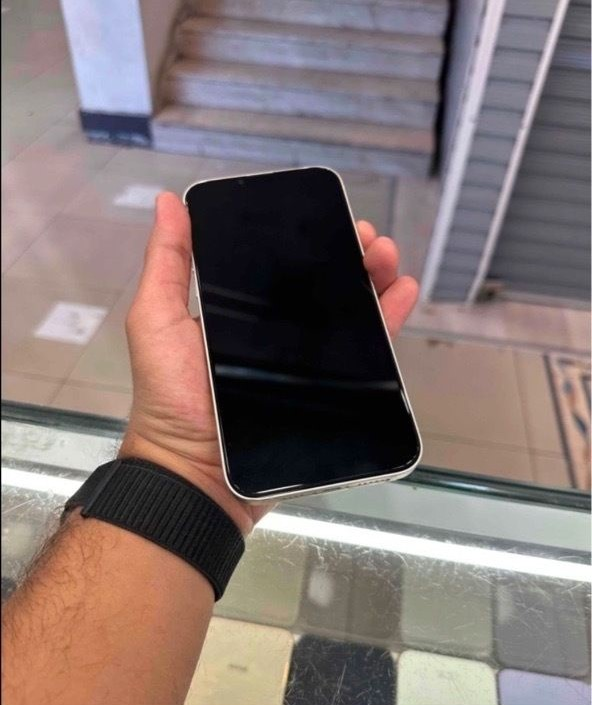

False

In [77]:
def is_image_watermarked(base64_image, model):
    prompt = """
    Please analyze the image and check if it contains any watermarks or logos. 
    If the image contains a watermark or logo, respond with "Watermarked" only. 
    If the image does not contain any watermarks or logos, respond with "Not watermarked"on;y.
    """
    message = [HumanMessage(content=[
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                },
            },
            {"type": "text", "text": prompt},
    ])]
    response = model.invoke(message).content.lower()
    return True if response == "watermarked" else False

# image_file = "D:/shobbak/AI/Glock-pistol.webp"
# image_file = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/Logo-Design-Company-India.jpg"
image_file = "D:/shobbak/AI/ايفون-13-العادي-302391379-898059++3.jpg"
# image_file = "D:/shobbak/AI/ايفون-13-العادي-302391379-8980593.jpg"


image_base64 = encode_image(image_file)
plt_img_base64(image_base64)
is_image_watermarked(image_base64, model)


In [66]:
def is_titleCategory_consistent(title, category, model):
    template = """
    Given the following title and category for a product on an e-commerce website:
    Title: {title}
    Category: {category}
    now check if the title and category are related to each other, 
    and reply only with `consistent` or `not consistent`.
    """
    
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model
    return True if chain.invoke({"title": title, "category": category}).content.lower() == "consistent" else False

is_titleCategory_consistent("new cars for sela", "fastion", model)




False